In [12]:
from google.colab import files
import pandas as pd

# Upload the data file
uploaded = files.upload()

# Iterate through the uploaded files and read the data
for file_name in uploaded.keys():
    data_path = file_name
    print(f'File "{file_name}" uploaded successfully.')

# Read the data
movie_data = pd.read_csv(data_path)

# Display the first few rows of the data
print(movie_data.head())


Saving p1_movie_metadata.csv to p1_movie_metadata (2).csv
File "p1_movie_metadata (2).csv" uploaded successfully.
   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                        

In [13]:
# Get information about the dataset
print(movie_data.info())

# Summary statistics for numerical features
print(movie_data.describe())

# Check for missing values
print(movie_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

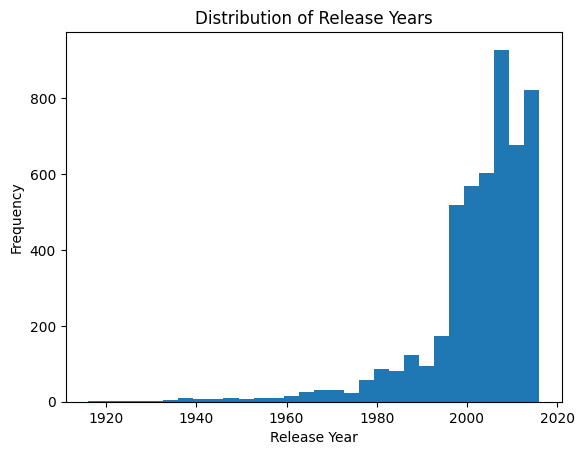

In [14]:
# Feature Engineering
# Example: Extracting the first name of the director
movie_data['director_first_name'] = movie_data['director_name'].str.split().str[0]


# Data Visualization
# Example: Visualize the distribution of release years
import matplotlib.pyplot as plt

plt.hist(movie_data['title_year'].dropna(), bins=30)
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Distribution of Release Years')
plt.show()



In [15]:
# Feature Engineering
# Number of Previous Movies by Director
movie_data['num_previous_movies'] = movie_data.groupby('director_name')['movie_title'].cumcount()

# Average IMDb Rating of Previous Movies by Director
movie_data['avg_imdb_rating_previous'] = movie_data.groupby('director_name')['imdb_score'].transform(lambda x: x.expanding().mean().shift(1))

# Decade of Release Year
movie_data['release_decade'] = (movie_data['title_year'] // 10) * 10

# Movie Title Length
movie_data['title_length'] = movie_data['movie_title'].apply(len)

# Number of Actors
movie_data['num_actors'] = movie_data['actor_1_name'].notnull().astype(int) + movie_data['actor_2_name'].notnull().astype(int) + movie_data['actor_3_name'].notnull().astype(int)

# Number of Genres
movie_data['num_genres'] = movie_data['genres'].str.split('|').apply(len)

# Display the updated dataset
print(movie_data.head())


   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

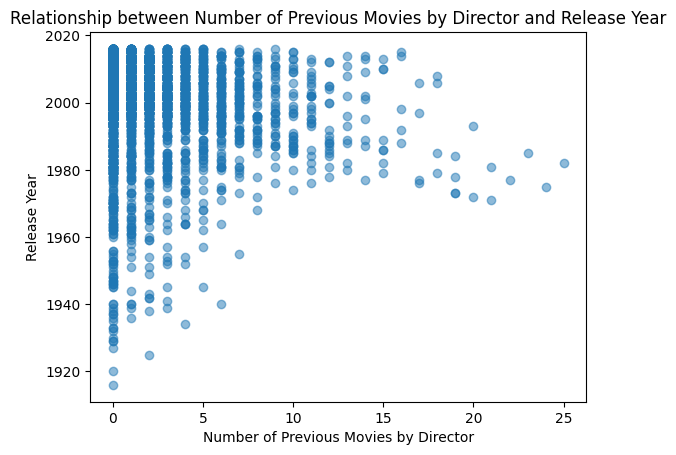

In [16]:
# Visualize relationship between number of previous movies by director and release year
plt.scatter(movie_data['num_previous_movies'], movie_data['title_year'], alpha=0.5)
plt.xlabel('Number of Previous Movies by Director')
plt.ylabel('Release Year')
plt.title('Relationship between Number of Previous Movies by Director and Release Year')
plt.show()


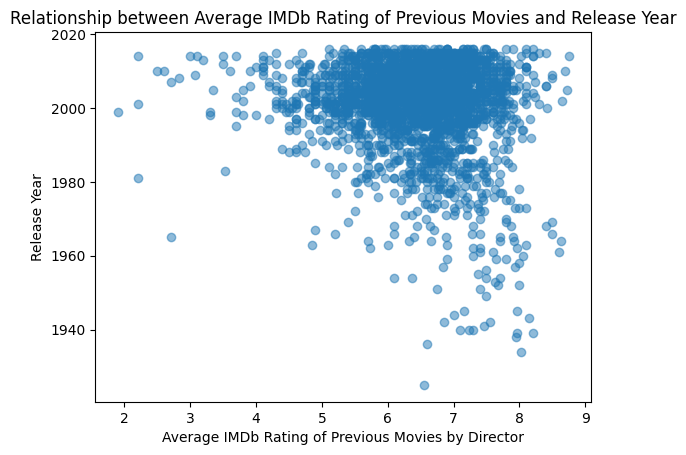

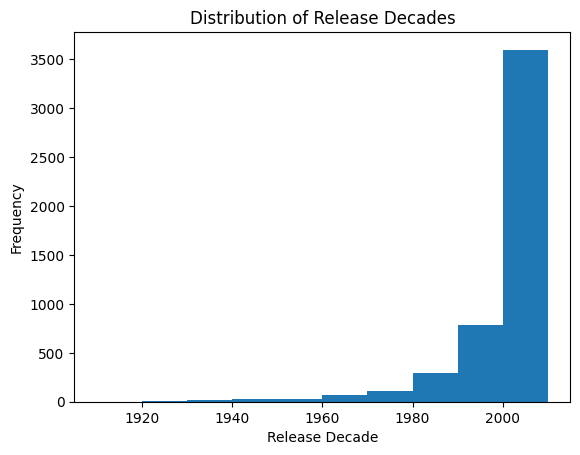

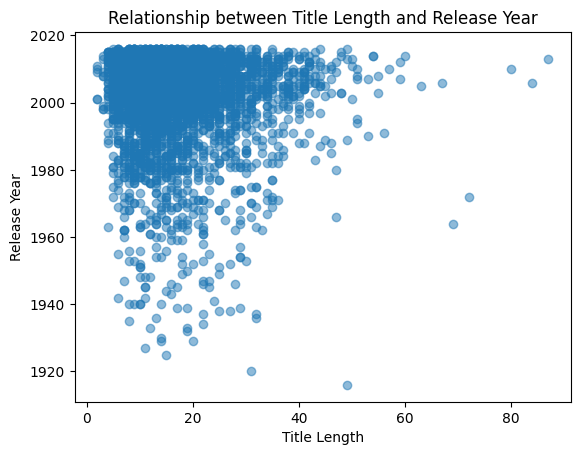

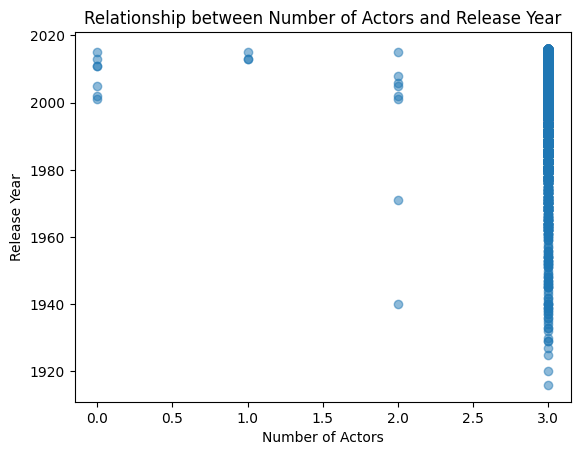

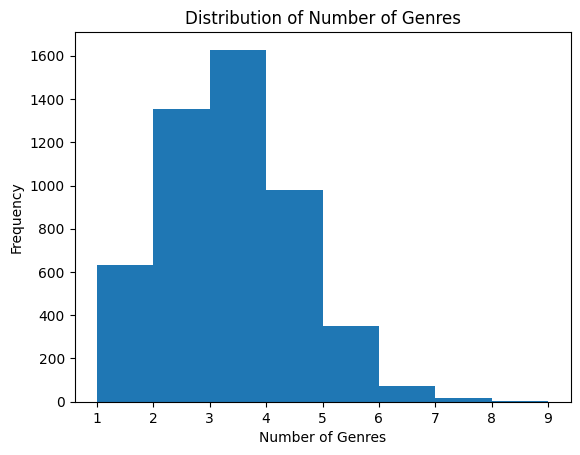

In [17]:
# Average IMDb Rating of Previous Movies vs. Release Year
plt.scatter(movie_data['avg_imdb_rating_previous'], movie_data['title_year'], alpha=0.5)
plt.xlabel('Average IMDb Rating of Previous Movies by Director')
plt.ylabel('Release Year')
plt.title('Relationship between Average IMDb Rating of Previous Movies and Release Year')
plt.show()

# Release Decade Distribution
plt.hist(movie_data['release_decade'].dropna(), bins=range(int(movie_data['release_decade'].min()), int(movie_data['release_decade'].max()) + 10, 10))
plt.xlabel('Release Decade')
plt.ylabel('Frequency')
plt.title('Distribution of Release Decades')
plt.show()

# Title Length vs. Release Year
plt.scatter(movie_data['title_length'], movie_data['title_year'], alpha=0.5)
plt.xlabel('Title Length')
plt.ylabel('Release Year')
plt.title('Relationship between Title Length and Release Year')
plt.show()

# Number of Actors vs. Release Year
plt.scatter(movie_data['num_actors'], movie_data['title_year'], alpha=0.5)
plt.xlabel('Number of Actors')
plt.ylabel('Release Year')
plt.title('Relationship between Number of Actors and Release Year')
plt.show()

# Number of Genres Distribution
plt.hist(movie_data['num_genres'], bins=range(1, movie_data['num_genres'].max() + 2))
plt.xlabel('Number of Genres')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Genres')
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Drop rows with missing values for simplicity
movie_data.dropna(inplace=True)

# Select features
features = ['num_previous_movies', 'avg_imdb_rating_previous', 'release_decade', 'title_length', 'num_actors', 'num_genres']
X = movie_data[features]
y = movie_data['title_year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 6.599500285124433


In [19]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Feature selection using Recursive Feature Elimination with Cross-Validation (RFECV)
selector = RFECV(estimator=RandomForestRegressor(), step=1, cv=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Model selection and hyperparameter tuning
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Machine': SVR()
}

param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'Support Vector Machine': {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5]}
}

best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_selected, y_train)
    best_models[name] = grid_search.best_estimator_

# Evaluate the best models
for name, model in best_models.items():
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Mean Squared Error:", mse)


Random Forest Mean Squared Error: 6.204998476280661
Gradient Boosting Mean Squared Error: 6.2097694684513804
Support Vector Machine Mean Squared Error: 6.323140573480964


In [25]:
# Function to extract a director's previous movies and their genres
def get_director_history(director_name):
    director_movies = movie_data[movie_data['director_name'] == director_name]
    return director_movies[['movie_title', 'title_year', 'genres']]

# Function to predict release year and probable genres for a given director
def predict_next_movie(director_name):
    # Get director's history
    director_history = get_director_history(director_name)

    if director_history.empty:
        return "No data available for the director.", None

    # Predict release year
    release_year_pred = director_history['title_year'].max() + 1

    # Predict probable genres
    # For simplicity, let's assume the next movie will have the same genres as the director's most recent movie
    genres_pred = director_history['genres'].iloc[-1].split('|')

    return release_year_pred, genres_pred

# Example usage
director_name = "Christopher Nolan"
release_year_pred, genres_pred = predict_next_movie(director_name)
print("Predicted Release Year:", release_year_pred)
print("Predicted Probable Genres:", genres_pred)


Predicted Release Year: 2015.0
Predicted Probable Genres: ['Mystery', 'Thriller']


In [26]:
# Function to extract a director's previous movies and their genres
def get_director_history(director_name):
    director_movies = movie_data[movie_data['director_name'] == director_name]
    return director_movies[['movie_title', 'title_year', 'genres']]

# Function to predict release year and probable genres for a given director
def predict_next_movie(director_name):
    # Get director's history
    director_history = get_director_history(director_name)

    if director_history.empty:
        return "No data available for the director.", None

    # Predict release year
    release_year_pred = director_history['title_year'].max() + 1

    # Predict probable genres
    # For simplicity, let's assume the next movie will have the same genres as the director's most recent movie
    genres_pred = director_history['genres'].iloc[-1].split('|')

    return release_year_pred, genres_pred

# Example usage
director_name = "James Cameron"
release_year_pred, genres_pred = predict_next_movie(director_name)
print("Predicted Release Year:", release_year_pred)
print("Predicted Probable Genres:", genres_pred)


Predicted Release Year: 1998.0
Predicted Probable Genres: ['Action', 'Sci-Fi']


In [27]:
# Function to extract a director's previous movies and their genres
def get_director_history(director_name):
    director_movies = movie_data[movie_data['director_name'] == director_name]
    return director_movies[['movie_title', 'title_year', 'genres']]

# Function to predict release year and probable genres for a given director
def predict_next_movie(director_name):
    # Get director's history
    director_history = get_director_history(director_name)

    if director_history.empty:
        return "No data available for the director.", None

    # Predict release year
    release_year_pred = director_history['title_year'].max() + 1

    # Predict probable genres
    # For simplicity, let's assume the next movie will have the same genres as the director's most recent movie
    genres_pred = director_history['genres'].iloc[-1].split('|')

    return release_year_pred, genres_pred

# Example usage
director_name = "Gore Verbinski"
release_year_pred, genres_pred = predict_next_movie(director_name)
print("Predicted Release Year:", release_year_pred)
print("Predicted Probable Genres:", genres_pred)


Predicted Release Year: 2014.0
Predicted Probable Genres: ['Comedy', 'Drama']


In [28]:
# Get unique director names
director_names = movie_data['director_name'].unique()

# Predict next movie for each director
predictions = {}
for director_name in director_names:
    release_year_pred, genres_pred = predict_next_movie(director_name)
    predictions[director_name] = {'Release Year': release_year_pred, 'Probable Genres': genres_pred}

# Display predictions
for director_name, prediction in predictions.items():
    print("Director:", director_name)
    print("Predicted Release Year:", prediction['Release Year'])
    print("Predicted Probable Genres:", prediction['Probable Genres'])
    print()


Director: Gore Verbinski
Predicted Release Year: 2014.0
Predicted Probable Genres: ['Comedy', 'Drama']

Director: Zack Snyder
Predicted Release Year: 2014.0
Predicted Probable Genres: ['Action', 'Horror', 'Thriller']

Director: Joss Whedon
Predicted Release Year: 2013.0
Predicted Probable Genres: ['Action', 'Adventure', 'Sci-Fi', 'Thriller']

Director: Peter Jackson
Predicted Release Year: 2014.0
Predicted Probable Genres: ['Action', 'Adventure', 'Drama', 'Romance']

Director: James Cameron
Predicted Release Year: 1998.0
Predicted Probable Genres: ['Action', 'Sci-Fi']

Director: Sam Mendes
Predicted Release Year: 2013.0
Predicted Probable Genres: ['Action', 'Adventure', 'Thriller']

Director: Sam Raimi
Predicted Release Year: 2014.0
Predicted Probable Genres: ['Adventure', 'Family', 'Fantasy']

Director: Michael Bay
Predicted Release Year: 2017.0
Predicted Probable Genres: ['Action', 'Adventure', 'Romance', 'Sci-Fi', 'Thriller']

Director: Marc Webb
Predicted Release Year: 2015.0
Predi